In [2]:
%load_ext autoreload
%autoreload 2
from plot import *
import os
import sys

sys.path.append(os.path.abspath('../'))
from analysis_util import *

from norm import read_norm_data
from sgd_weights import sgd_weights

config=None
inputs=None
target=None
norm=None


In [3]:
device = 'cpu'

In [4]:
results_path = '../../results/fourier-features/conditions/128_features/run_2774234879735304686'

cppns, config = get_cppns_by_batch(results_path, 10000, True, device=device)
inputs = load_inputs(results_path)

  3%|▎         | 1/37 [00:00<00:14,  2.54it/s]

100%|██████████| 37/37 [00:00<00:00, 52.67it/s]


Loaded 2 genomes


In [5]:
for k, cppn in cppns.items():
    print("CX", len(cppn.enabled_connections))
    print("N", len(cppn.nodes))
    

CX 886
N 147
CX 825
N 177


In [335]:
from copy import deepcopy
config_copy = deepcopy(config)

config_copy.n_fourier_features = 0
config_copy.num_inputs = 3

config_copy.hidden_nodes_at_start = [128, 16]
config_copy.init_connection_probability =0.0
config_copy.force_init_path_inputs_outputs = True

print(config.output_activation)
if len(config.output_activation) == 0:
    config_copy.output_activation = None

from cppn import CPPN

cppn = CPPN(config_copy)

img = cppn(inputs, channel_first=False).detach().cpu().numpy()

print("CXS", len(cppn.connections))
print("CXS", len(cppn.enabled_connections))
print("N", len(cppn.nodes))
# print("prune")
# cppn.prune(config_copy)
# print("CXS", len(cppn.connections))
# print("CXS", len(cppn.enabled_connections))
# print("N", len(cppn.nodes))


-4 : ['-1,38', '38,142', '142,-4']
weights: [2.551194190979004, -2.3667547702789307, 3.5483245849609375]
-5 : ['-3,74', '74,141', '141,-5']
weights: [-0.7546034455299377, 3.197143316268921, -0.6180698871612549]
-6 : ['-3,50', '50,130', '130,-6']
weights: [-2.794822931289673, 2.0831189155578613, 5.316186428070068]
['142,-4', '38,142', '-1,38', '141,-5', '74,141', '-3,74', '130,-6', '50,130', '-3,50']
[{'-3', '-2', '-1'}, {'50', '74', '38'}, {'130', '142', '141'}, {'-5', '-4', '-6'}]
-3 []
-2 []
-1 []
50 [tensor([[-3.9525, -3.9215, -3.8907,  ..., -3.8907, -3.9215, -3.9525],
        [-3.9215, -3.8902, -3.8592,  ..., -3.8592, -3.8902, -3.9215],
        [-3.8907, -3.8592, -3.8280,  ..., -3.8280, -3.8592, -3.8907],
        ...,
        [-3.8907, -3.8592, -3.8280,  ..., -3.8280, -3.8592, -3.8907],
        [-3.9215, -3.8902, -3.8592,  ..., -3.8592, -3.8902, -3.9215],
        [-3.9525, -3.9215, -3.8907,  ..., -3.8907, -3.9215, -3.9525]],
       grad_fn=<MulBackward0>)]
74 [tensor([[-1.0672, -1

In [336]:
from cppn.visualize import visualize_network
# visualize_network(cppn, config_copy, show=True)

In [337]:
print(list(cppn.connections.keys()))

output_node = '-3'



['142,-4', '38,142', '-1,38', '141,-5', '74,141', '-3,74', '130,-6', '50,130', '-3,50']


['142,-4', '38,142', '-1,38', '141,-5', '74,141', '-3,74', '130,-6', '50,130', '-3,50']
[{'-3', '-2', '-1'}, {'50', '74', '38'}, {'130', '142', '141'}, {'-5', '-4', '-6'}]
['142,-4', '38,142', '-1,38', '141,-5', '74,141', '-3,74', '130,-6', '50,130', '-3,50']
[{'-3', '-2', '-1'}, {'50', '74', '38'}, {'130', '142', '141'}, {'-5', '-4', '-6'}]
-3 []
-2 []
-1 []
50 [tensor([[-3.9525, -3.9215, -3.8907,  ..., -3.8907, -3.9215, -3.9525],
        [-3.9215, -3.8902, -3.8592,  ..., -3.8592, -3.8902, -3.9215],
        [-3.8907, -3.8592, -3.8280,  ..., -3.8280, -3.8592, -3.8907],
        ...,
        [-3.8907, -3.8592, -3.8280,  ..., -3.8280, -3.8592, -3.8907],
        [-3.9215, -3.8902, -3.8592,  ..., -3.8592, -3.8902, -3.9215],
        [-3.9525, -3.9215, -3.8907,  ..., -3.8907, -3.9215, -3.9525]],
       grad_fn=<MulBackward0>)]
74 [tensor([[-1.0672, -1.0588, -1.0505,  ..., -1.0505, -1.0588, -1.0672],
        [-1.0588, -1.0504, -1.0420,  ..., -1.0420, -1.0504, -1.0588],
        [-1.0505, -1.042

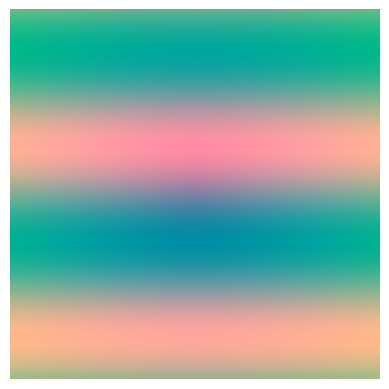

In [338]:
import matplotlib.pyplot as plt
cppn_copy = cppn.clone(config_copy)
cppn_copy.update_layers()
img = cppn_copy(inputs, channel_first=False).detach().cpu().numpy()
plt.imshow(img)
plt.axis('off')
plt.show()
